## Adrián Lapaz 1706 - Algoritmos evolutivos I

---
## Introducción:

Los sensores ópticos remotos instalados en plataformas satelitales registran de forma periódica la energía electromagnética reflejada y emitida por la superficie terrestre hacia el espacio. En particular, los sensores MSI de los satélites Sentinel-2 proporcionan datos en múltiples bandas espectrales, correspondientes a distintas regiones del espectro electromagnético observado. A partir de estas bandas, se derivan diversos índices de vegetación mediante combinaciones algebraicas de la reflectancia registrada en diferentes longitudes de onda. El más ampliamente utilizado es el Índice de Vegetación de Diferencia Normalizada (NDVI), calculado como (NIR−Red)/(NIR+Red), donde NIR y Red representan la reflectancia en el infrarrojo cercano y el rojo, respectivamente; este índice permite estimar la biomasa y el vigor vegetal, dado que la vegetación activa refleja más en el NIR y absorbe más en el rojo. Además, tanto el NDVI como otros índices espectrales se han empleado con éxito en el monitoreo agrícola, especialmente en la modelación de parámetros biofísicos como la biomasa aérea seca acumulada. Sin embargo, en cultivos como el maíz (*Zea mays L.*), estos índices presentan limitaciones para estimar con precisión el estado nutricional nitrogenado y el contenido hídrico del cultivo a lo largo de sus distintos estadios fenológicos. En este sentido, una alternativa para superar dichas limitaciones consiste en la generación de nuevos índices de vegetación mediante algoritmos de Programación Genética (GP, por sus siglas en inglés), los cuales permiten combinar bandas espectrales en ecuaciones empíricas optimizadas y evaluarlas frente a variables observadas. Por tanto, se plantea la hipótesis de que el uso de algoritmos de GP permitirá modelar con mayor precisión el Índice de Nutrición Nitrogenada (*Nitrogen Nutrition Index*, NNI) y el Índice de Diagnóstico Hídrico (*Water Diagnosis Index*, WDI) durante el crecimiento del cultivo de maíz.

---
### Bandas satelitales de Sentinel-2



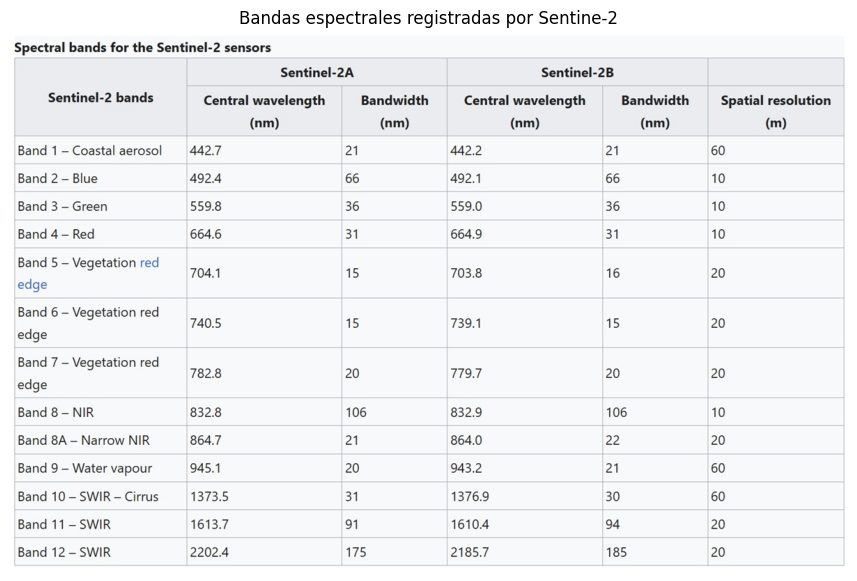

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

bands = mpimg.imread("images/bands.jpg")

plt.figure(figsize=(12,7), dpi=100)
plt.imshow(bands)
plt.axis("off")
plt.title("Bandas espectrales registradas por Sentine-2")
plt.show()


---
### Índice de Nutrición Nitrogenada
El NNI es un indicador del estado nutricional del cultivo respecto al nitrógeno (N). Se define como el cociente entre la concentración actual de N en la biomasa aérea del cultivo y la concentración crítica necesaria para un crecimiento óptimo:

$$
\text{NNI} = \frac{N_{\text{actual}}}{N_{\text{crítico}}}
$$

donde:

- $N_{\text{actual}} $: concentración de N (%) medida en la biomasa aérea del cultivo.  
- $N_{\text{crítico}}$: concentración mínima de N (%) que el cultivo debería tener, en función de su biomasa aérea, para alcanzar el crecimiento máximo sin limitación por N.


**Interpretación:**

- Si $\text{NNI} > 1$: exceso de N (consumo de lujo de N).  
- Si $\text{NNI} = 1$: nutrición adecuada (el crecimiento no está limitado por N).  
- Si $\text{NNI} < 1$: deficiencia de N (posible necesidad de fertilización).


---
### Índice de Diagnóstico Hídrico

El WDI es un indicador del estado hídrico del cultivo desarrollado para los estadios vegetativos del maíz. Al igual que el NNI, el WDI se construye a partir de relaciones alométricas entre variables fisiológicas del cultivo basado en la Saturación de Agua Acumulada (*Saturated Water Accumulation*, SWA) en función de la biomasa aérea seca acumulada.

El WDI se calcula como el cociente entre la SWA actual y la SWA crítica para un valor dado de BA:

$$
\text{WDI} = \frac{\text{SWA}_{\text{actual}}}{\text{SWA}_{\text{crítica}}}
$$

donde:

- $\text{SWA}_{\text{actual}}$: saturación de agua acumulada actual en la planta.  
- $\text{SWA}_{\text{crítica}}$: saturación de agua necesaria para un estado hídrico óptimo, según la biomasa aérea seca acumulada.  

**Interpretación:**

- Si $\text{WDI} \geq 1$): el cultivo tiene una **condición hídrica adecuada**.
- Si $\text{WDI} < 1$: el cultivo presenta **déficit hídrico**.


---
## Datos

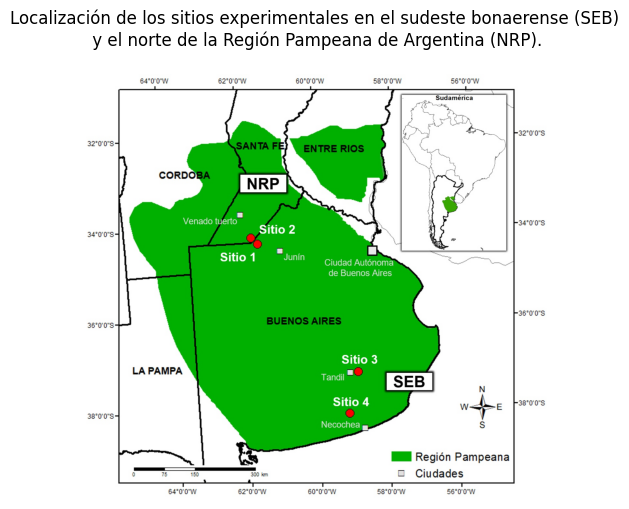

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

RP = mpimg.imread("images/RP.jpg")

plt.figure(figsize=(6,6), dpi=100)
plt.imshow(RP)
plt.axis("off")
plt.title(f"Localización de los sitios experimentales en el sudeste bonaerense (SEB)\n y el norte de la Región Pampeana de Argentina (NRP).\n")
plt.show()

Los datos son:
* Point: identificador de la unidad experimental.
* RP: variable que representa la Región Pampeana Argentina, con valores para las subregiones Norte de la RP y Sudeste Bonaerense (SEB).
* Stage: estadíos fenológicos de $V_6$, $V_{10}$, $V_{14}$ y $R_1$, que se corresponden con seis, diez y catorce hojas desarrolladas y floración, respectivamente.
* Site: identificador del sitio experimental.
* MZ: zona de manejo productiva del lote donde se ubicó el experimento, clasificada en cuatro categorías según el nivel productivo: muy alta (VH), alta (H), media (M) y baja (L).
* Block: número de bloque.
* Experiment: identificador del experimento (diseño en bloques aleatorios con tres repeticiones y cinco tratamientos).
* Treatment: tratamiento, donde 0N, 60N, 120N, 180N y 240N corresponden a dosis de fertilización de 0, 60, 120, 180 y 240 $N,kg,ha^{-1}$ aplicadas a la siembra.
* NNI y WDI: variables observadas en planta.
* Bandas espectrales de Sentinel-2 utilizadas: 'B2','B3','B4','B5','B6','B7','B8','B11','B12','B8A' (ver figura con el detalle de las bandas).

In [3]:
import pandas as pd

df = pd.read_csv("datasets/corn.csv")

df.head(5)

,Point,RP,Stage,Site,MZ,Experiment,Block,Treatment,NNI,WDI,B2,B3,B4,B5,B6,B7,B8,B11,B12,B8A
0,1,NRP,V6,1,VH,1,1,180N,1.276,1.031,0.1023,0.1241,0.1427,0.1805,0.2343,0.2624,0.2679,0.3675,0.2926,0.2910
1,2,NRP,V6,1,VH,1,1,240N,1.274,1.034,0.1040,0.1256,0.1453,0.1821,0.2402,0.2695,0.2773,0.3744,0.2963,0.2974
2,3,NRP,V6,1,VH,1,1,0N,1.048,0.907,0.0981,0.1202,0.1373,0.1770,0.2354,0.2660,0.2723,0.3678,0.2905,0.2911
3,4,NRP,V6,1,VH,1,1,120N,1.208,0.949,0.0999,0.1219,0.1409,0.1790,0.2355,0.2653,0.2690,0.3700,0.2916,0.2924
4,5,NRP,V6,1,VH,1,1,60N,1.192,0.977,0.0991,0.1226,0.1411,0.1807,0.2426,0.2720,0.2775,0.3715,0.2930,0.3008


---
## Modelación


### Flujo de trabajo

A partir de las bandas espectrales y las determinaciones en planta, se realizó un análisis mediante un algoritmo de GP. Los datos se dividieron en conjuntos de calibración (*train*, 80 %) y validación (*test*, 20 %). Durante el entrenamiento del GP, se evaluaron las funciones de aptitud RMSE y KGE, con el objetivo de determinar cuál de ellas ofrece un mejor desempeño en la modelación de las variables observadas derivadas de los índices de vegetación generados.

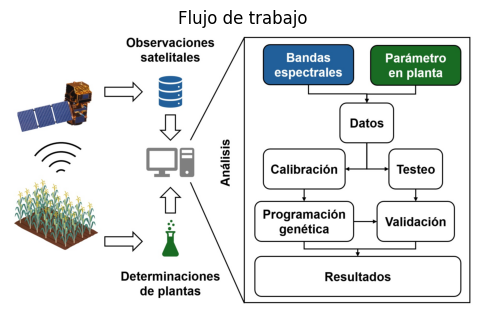

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

workflow = mpimg.imread("images/workflow.jpg")

plt.figure(figsize=(6,4), dpi=100)
plt.imshow(workflow)
plt.axis("off")
plt.title("Flujo de trabajo")
plt.show()


### Función de aptitud 

Para GP, la **función de aptitud** (*fitness function*) evalúa el desempeño de cada individuo o modelo candidato dentro de una población, asignándole una puntuación que refleja su capacidad para resolver el problema planteado. En este contexto, dependiendo de la metrica utlizada (puede ser menor o mayor), una mejor puntuación de aptitud indica un mejor ajuste entre las predicciones del modelo y los valores observados. 

Durante el proceso de calibración del algoritmo de GP, se aplicaron dos funciones de aptitud: el error cuadrático medio (RMSE) y la eficiencia Kling–Gupta (KGE), con el objetivo de comparar su desempeño en la modelación de las variables observadas.

#### Error cuadrático medio

El RMSE es una métrica ampliamente utilizada para cuantificar la diferencia entre valores simulados y observados. Se define como:

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 }
$$

donde:
- $y_i$: valor observado,
- $\hat{y}_i$: valor simulado por el modelo,
- $n$: número total de observaciones.

Al emplear el RMSE como función de aptitud, se busca **minimizar** este valor. Un RMSE menor indica un modelo con errores de predicción más pequeños, mientras que valores altos reflejan un mayor desacuerdo entre simulaciones y observaciones.

#### Eficiencia Kling–Gupta
La KGE [(Kling et al., 2012)](https://doi.org/10.1016/j.jhydrol.2012.01.011) es una métrica integral de desempeño ampliamente utilizada en modelación hidrológica y ambiental. A diferencia de medidas tradicionales como el RMSE, la KGE descompone el ajuste del modelo en tres componentes fundamentales:

$$
\text{KGE} = 1 - \sqrt{(r - 1)^2 + (\alpha - 1)^2 + (\beta - 1)^2}
$$

donde:
- $r$: coeficiente de correlación entre los valores observados y simulados (representa la concordancia temporal),
- $\alpha = \frac{\sigma_s}{\sigma_o}$: relación entre las desviaciones estándar de los valores simulados ($\sigma_s$) y observados ($\sigma_o$) (representa la variabilidad relativa),
- $\beta = \frac{\mu_s}{\mu_o}$: relación entre las medias simuladas ($\mu_s$) y observadas ($\mu_o$) (representa el sesgo o error medio).

El valor de KGE = 1 indica una concordancia perfecta entre las simulaciones y las observaciones, mientras que valores cercanos a cero o negativos reflejan un bajo desempeño del modelo. El objetivo al utilizar la KGE como función de aptitud es maximizar su valor, dado que su valor óptimo es exactamente 1, lo cual representa una correspondencia perfecta. A diferencia del RMSE, la KGE ofrece una evaluación más equilibrada del ajuste, ya que descompone el desempeño en tres componentes clave: la correlación temporal, la variabilidad relativa y el sesgo medio, evitando que buenas coincidencias en un solo componente enmascaren un mal ajuste general. Además, comparte una escala similar a la del coeficiente de determinación $R^2$, pero la KGE permite una evaluación más completa y robusta del ajuste entre simulaciones y observaciones, dado que su estructura evita compensaciones engañosas y proporciona una medición que refleja mejor la precisión global del modelo.


In [ ]:
from gplearn.fitness import make_fitness
import numpy as np

def KGE(y, y_pred, w):

    FLOOR = -10.0
    y = np.asarray(y, float).ravel()
    y_pred = np.asarray(y_pred, float).ravel()

    # Elimina pares no válidos (NaN o Inf)
    m = np.isfinite(y) & np.isfinite(y_pred)
    y, y_pred = y[m], y_pred[m]
    if y.size < 2:
        return FLOOR 

    # Desviaciones estándar de y y y_pred
    sy = np.std(y, ddof=1)
    sp = np.std(y_pred, ddof=1)

    # Cálculo de la correlación
    if sy == 0 or sp == 0:
        r = 0.0 
    else:
        r = np.corrcoef(y, y_pred)[0, 1]
        if not np.isfinite(r):
            r = 0.0

    # Cálculo de componentes del KGE
    alpha = sp / sy if sy != 0 else 0.0 
    beta = np.mean(y_pred) / np.mean(y) if np.mean(y) != 0 else 0.0 

    # Cálculo del KGE
    kge = 1.0 - np.sqrt((r - 1.0)**2 + (alpha - 1.0)**2 + (beta - 1.0)**2)

    return kge if np.isfinite(kge) else FLOOR


## Algoritmo de Programación genética

In [ ]:
from gplearn.genetic import SymbolicRegressor

def run_gp_model(X_train, y_train, X_test, fitness, benchmark, verbose=1,
                 function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'sin', 'cos'),
                 generations=200, population_size=5000, parsimony=0.001, random_state=42):
    model = SymbolicRegressor(
        population_size=population_size, # número de fórmulas en cada generación
        generations=generations,         # número de generaciones
        metric=fitness,                  # función de aptitud
        stopping_criteria=benchmark,     # si encuentra por ej. R² > 0.99, se detiene
        function_set=function_set,       # operadores permitidos
        p_crossover=0.7,                 # probabilidad de cruce
        p_subtree_mutation=0.1,          # probabilidad de mutar un subárbol
        p_hoist_mutation=0.05,           # mutación que simplifica (reduce tamaño)
        p_point_mutation=0.1,            # mutación de un solo nodo
        parsimony_coefficient=parsimony, # penaliza fórmulas muy largas (evita sobreajuste)
        max_samples=1.0,                 # usar todos los datos para evaluar
        random_state=random_state,
        verbose=verbose                  # muestra progreso
    )

    # Entrenamiento
    model.fit(X_train, y_train)
    
    # Predicción
    y_pred = model.predict(X_test)
    
    return model, y_pred


---
## NNI

### Separación entre datos de Calibración y Testeo

In [7]:
import numpy as np
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split

# Selección de bandas espectrales
bandas = ['B2','B3','B4','B5','B6','B7','B8','B11','B12','B8A']


# Separacion de variables predictoras (X) y objetivo (y)
X = df[['B2','B3','B4','B5','B6','B7','B8','B11','B12','B8A']].values  # 11 filas x 10 columnas
y = df['NNI'].values
stage = df['Stage'].values

# Division en train/test
X_train, X_test, y_train, y_test, stage_train, stage_test = train_test_split(X, y, stage, test_size=0.2, random_state=42)


In [ ]:
# Para filtrar valores X e y no finitos (NaN, Inf)
def _finite_mask(X, y):
    X = np.asarray(X, float)
    y = np.asarray(y, float)
    m = np.isfinite(X).all(axis=1) & np.isfinite(y)
    return X[m], y[m]

X_train, y_train = _finite_mask(X_train, y_train)
X_test,  y_test  = _finite_mask(X_test,  y_test)

###

#### RMSE para NNI

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from gplearn.fitness import make_fitness

EPSILON = 0.001

# Definición de tu función de aptitud
def rmse_inverse_fitness(y, y_pred, sample_weight):
    """Función de aptitud inversa del RMSE (mayor es mejor)."""
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return 1 / (rmse + EPSILON)  # 1/(f(x)+ε)

# make_fitness para gplearn
rmse_inverse_metric = make_fitness(
    function=rmse_inverse_fitness,
    greater_is_better=True
)

NNI_rmse_gp, NNI_rmse_y_pred  = run_gp_model(X_train, y_train, X_test, fitness=rmse_inverse_metric, benchmark=999, verbose=1,
                 function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'sin', 'cos'),
                 generations=200, population_size=5000, parsimony=0.001, random_state=42)

# Evaluación
def KGE_eval(y, y_hat):
    return KGE(y, y_hat, None)

print("\nR2  =", round(r2_score(y_test, NNI_rmse_y_pred),3))
print("RMSE=", round(np.sqrt(mean_squared_error(y_test, NNI_rmse_y_pred)),3))
print("KGE =", round(KGE_eval(y_test, NNI_rmse_y_pred),3))
print(f"\nFórmula descubierta:")
print(NNI_rmse_gp._program)


C:\Users\adria\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.24          1.58076       17          4.86395              N/A     33.75m
   1     6.45          3.12707       19          4.92113              N/A     12.65m
   2     7.73          3.14557       22          4.94213              N/A      8.23m
   3     9.89           3.1169       35          5.06621              N/A      7.92m
   4    14.31          3.05319       34          5.08144              N/A      8.65m
   5    19.18          3.03717       38          5.09268              N/A      8.81m
   6    22.87          3.08047       37          5.11912              N/A      8.40m
   7    29.04          3.17842       37          5.14079              N/A      8.58m
   8    37.05          3.37774       67          5.18096              N/A  

#### KGE para NNI

In [10]:
from sklearn.metrics import r2_score, mean_squared_error
from gplearn.fitness import make_fitness


kge_metric = make_fitness(
    function=KGE, 
    greater_is_better=True,
    wrap=True
)

NNI_kge_gp, NNI_kge_y_pred  = run_gp_model(X_train, y_train, X_test, fitness=kge_metric, benchmark=0.99, verbose=1,
                 function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'sin', 'cos'),
                 generations=200, population_size=5000, parsimony=0.001, random_state=42)

# Evaluación
def KGE_eval(y, y_hat):
    return KGE(y, y_hat, None)

print("\nR2  =", round(r2_score(y_test, NNI_kge_y_pred), 3))
print("RMSE=", round(np.sqrt(mean_squared_error(y_test, NNI_kge_y_pred)), 3))
print("KGE =", round(KGE_eval(y_test, NNI_kge_y_pred), 3))
print(f"\nFórmula descubierta:")
print(NNI_kge_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


C:\Users\adria\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


   0     9.24         -13.4794        8         0.296115              N/A     24.11m
   1     9.25         -1.22658        8         0.387103              N/A     35.76m
   2    10.67         -1.92167       13          0.41163              N/A     37.75m
   3    11.41         -1.18653       22         0.450066              N/A     40.27m
   4    12.34         -1.09992       22         0.450066              N/A     26.95m
   5    12.30        -0.400693       24         0.490003              N/A     29.77m
   6    13.19        -0.403437       26         0.494581              N/A     29.30m
   7    15.24         -0.41941       29         0.530586              N/A     36.62m
   8    17.25        -0.381455       29         0.530586              N/A     40.04m
   9    18.72        -0.319985       25         0.535102              N/A     33.60m
  10    20.33        -0.287841       30         0.559962              N/A     27.51m
  11    19.38        -0.301694       30         0.559962         

#### RMSE vs KGE para NNI

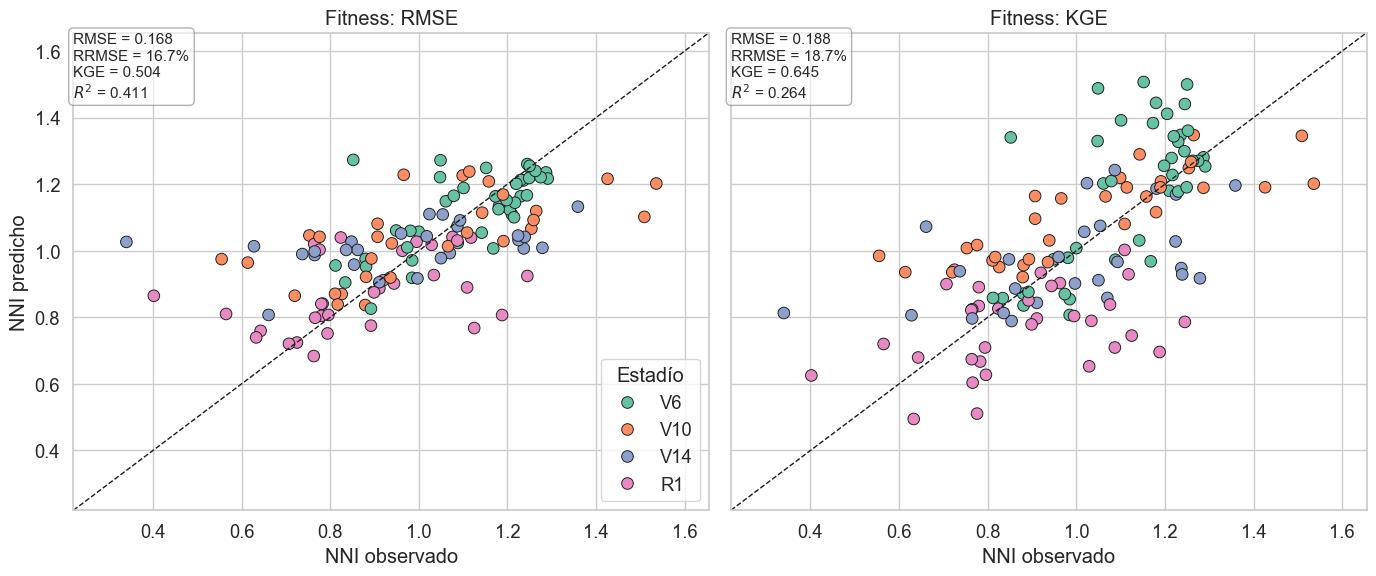

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

sns.set(style="whitegrid", font_scale=1.2)

orden_etapas = ['V6', 'V10', 'V14', 'R1']
stage_test = pd.Categorical(stage_test, categories=orden_etapas, ordered=True)

def compute_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    rrmse = (rmse / np.mean(y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    kge_val = KGE(y_true, y_pred, None)
    return rmse, rrmse, r2, kge_val

rmse_r, rrmse_r, r2_r, kge_r = compute_metrics(y_test, NNI_rmse_y_pred)
rmse_k, rrmse_k, r2_k, kge_k = compute_metrics(y_test, NNI_kge_y_pred)

min_val = min(np.min(y_test), np.min(NNI_rmse_y_pred), np.min(NNI_kge_y_pred))
max_val = max(np.max(y_test), np.max(NNI_rmse_y_pred), np.max(NNI_kge_y_pred))
buffer = (max_val - min_val) * 0.1
lims = (min_val - buffer, max_val + buffer)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Panel 1: modelo con fitness RMSE
sns.scatterplot(x=y_test, y=NNI_rmse_y_pred, hue=stage_test,
                ax=axes[0], palette='Set2', s=70, edgecolor='k')

handles, labels = axes[0].get_legend_handles_labels()
orden_indices = [labels.index(e) for e in orden_etapas if e in labels]
axes[0].legend(
    [handles[i] for i in orden_indices],
    [labels[i] for i in orden_indices],
    title="Estadío"
)

axes[0].plot(lims, lims, 'k--', lw=1)
axes[0].set_title("Fitness: RMSE")
axes[0].set_xlabel("NNI observado")
axes[0].set_ylabel("NNI predicho")
axes[0].set_xlim(lims)
axes[0].set_ylim(lims)
axes[0].text(
    lims[0], lims[1],
    f"RMSE = {rmse_r:.3f}\nRRMSE = {rrmse_r:.1f}%\nKGE = {kge_r:.3f}\n$R^2$ = {r2_r:.3f}",
    va='top', ha='left', fontsize=11,
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.6)
)

# Panel 2: modelo con fitness KGE
sns.scatterplot(x=y_test, y=NNI_kge_y_pred, hue=stage_test,
                ax=axes[1], palette='Set2', s=70, edgecolor='k', legend=False)

axes[1].plot(lims, lims, 'k--', lw=1)
axes[1].set_title("Fitness: KGE")
axes[1].set_xlabel("NNI observado")
axes[1].set_ylabel("NNI predicho")
axes[1].set_xlim(lims)
axes[1].set_ylim(lims)
axes[1].text(
    lims[0], lims[1],
    f"RMSE = {rmse_k:.3f}\nRRMSE = {rrmse_k:.1f}%\nKGE = {kge_k:.3f}\n$R^2$ = {r2_k:.3f}",
    va='top', ha='left', fontsize=11,
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.6)
)

plt.tight_layout()
plt.show()


---
## WDI

### Separación entre datos de Calibración y Testeo

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Selección de bandas espectrales
bandas = ['B2','B3','B4','B5','B6','B7','B8','B11','B12','B8A']

# Filtrar solo las filas válidas de df porque WDI solo tiene datos observados en V6, V10 y V14
df_valid = df[np.isfinite(df['WDI'])] 

X = df_valid[bandas].values
y = df_valid['WDI'].values
stage = df_valid['Stage'].values

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test, stage_train, stage_test = train_test_split(
    X, y, stage, test_size=0.2, random_state=42
)


In [ ]:
# Filtrado de valores X e y no finitos (NaN, Inf)
def _finite_mask(X, y):
    X = np.asarray(X, float)
    y = np.asarray(y, float)
    m = np.isfinite(X).all(axis=1) & np.isfinite(y)
    return X[m], y[m]

X_train, y_train = _finite_mask(X_train, y_train)
X_test,  y_test  = _finite_mask(X_test,  y_test)

stage_train = stage_train[:len(y_train)]
stage_test = stage_test[:len(y_test)]

#### RMSE para WDI

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
from gplearn.fitness import make_fitness

EPSILON = 0.001

# Función de aptitud
def rmse_inverse_fitness(y, y_pred, sample_weight):
    """Función de aptitud inversa del RMSE (mayor es mejor)."""
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return 1 / (rmse + EPSILON)

# make_fitness para gplearn
rmse_inverse_metric = make_fitness(
    function=rmse_inverse_fitness,
    greater_is_better=True
)

WDI_rmse_gp, WDI_rmse_y_pred  = run_gp_model(X_train, y_train, X_test, fitness=rmse_inverse_metric, benchmark=999, verbose=1,
                 function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'sin', 'cos'),
                 generations=200, population_size=5000, parsimony=0.001, random_state=42)

# Evaluación
def KGE_eval(y, y_hat):
    return KGE(y, y_hat, None)

print("\nR2  =", round(r2_score(y_test, WDI_rmse_y_pred),3))
print("RMSE=", round(np.sqrt(mean_squared_error(y_test, WDI_rmse_y_pred)), 3))
print("KGE =", round(KGE_eval(y_test, WDI_rmse_y_pred), 3))
print(f"\nFórmula descubierta:")
print(WDI_rmse_gp._program)


C:\Users\adria\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.24          1.74087       13          6.01058              N/A     39.64m
   1     6.52          3.48748       13          6.02698              N/A     43.18m
   2     7.12          3.56434       16          6.04025              N/A     40.85m
   3     8.88          3.61408        5          6.12037              N/A     24.24m
   4    10.86          4.02916       11          6.43017              N/A     36.08m
   5    12.31           4.0644       15          6.45545              N/A     39.65m
   6    12.42          4.06406       21          6.48498              N/A     39.73m
   7    11.41          4.08803       18          6.54013              N/A     30.13m
   8    13.23          4.02558       18          6.67571              N/A  

#### KGE para WDI

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
from gplearn.fitness import make_fitness


kge_metric = make_fitness(
    function=KGE, 
    greater_is_better=True,
    wrap=True
)

WDI_kge_gp, WDI_kge_y_pred  = run_gp_model(X_train, y_train, X_test, fitness=kge_metric, benchmark=0.99, verbose=1,
                 function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'sin', 'cos'),
                 generations=200, population_size=5000, parsimony=0.001, random_state=42)

# Evaluación
def KGE_eval(y, y_hat):
    return KGE(y, y_hat, None)

print("\nR2  =", round(r2_score(y_test, WDI_kge_y_pred),3))
print("RMSE=", round(np.sqrt(mean_squared_error(y_test, WDI_kge_y_pred)), 3))
print("KGE =", round(KGE_eval(y_test, WDI_kge_y_pred), 3))
print(f"\nFórmula descubierta:")
print(WDI_kge_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


C:\Users\adria\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


   0     9.24         -20.9443       33         0.542113              N/A     44.42m
   1     9.47         -2.21122       10         0.616294              N/A     31.22m
   2    11.94         -3.52749       33         0.623912              N/A     36.20m
   3    14.34        -0.834414       34         0.680977              N/A     46.70m
   4    21.16          -2.5266       34          0.68216              N/A     21.07m
   5    21.80         -3.24427       35         0.699122              N/A      6.98m
   6    20.64         -3.36387       30         0.705249              N/A      6.68m
   7    21.66         -3.34425       27         0.721317              N/A      6.80m
   8    25.30          -1.5456       36         0.738404              N/A      8.04m
   9    28.54         -1.74475       39          0.73243              N/A      6.96m
  10    29.02         -1.69217       33         0.743879              N/A      7.06m
  11    29.41         -2.33233       50          0.75621         

#### RMSE vs KGE para NNI

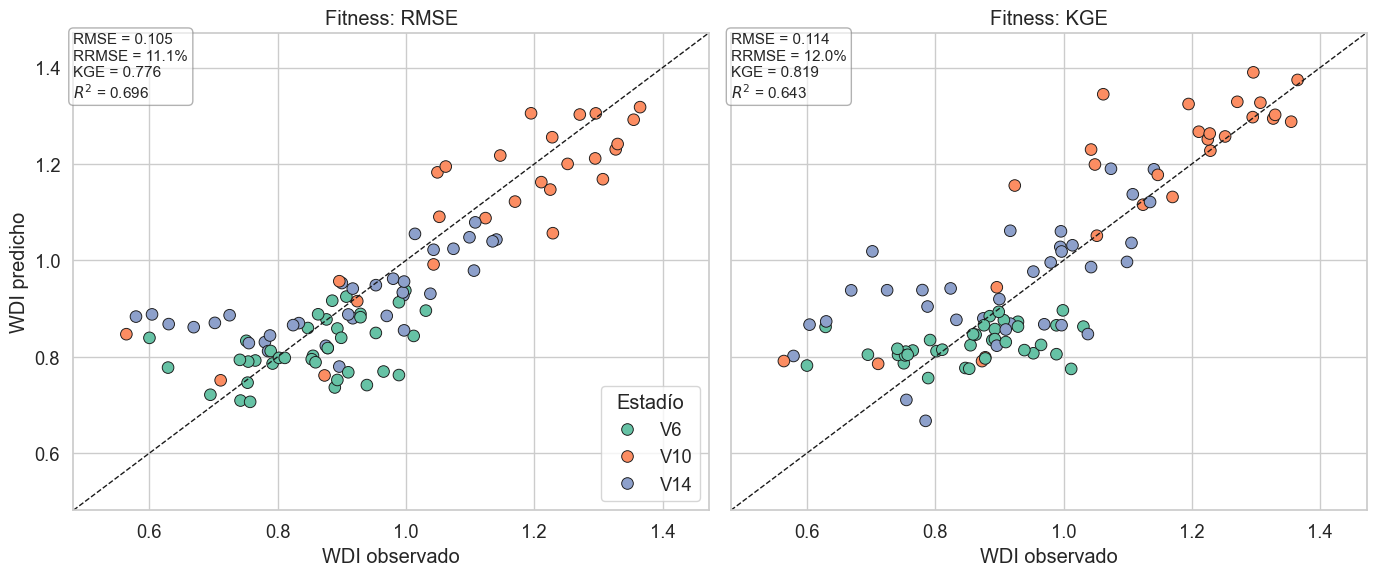

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

sns.set(style="whitegrid", font_scale=1.2)

orden_etapas = ['V6', 'V10', 'V14']
stage_test = pd.Categorical(stage_test, categories=orden_etapas, ordered=True)

def compute_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    rrmse = (rmse / np.mean(y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    kge_val = KGE(y_true, y_pred, None)
    return rmse, rrmse, r2, kge_val

rmse_r, rrmse_r, r2_r, kge_r = compute_metrics(y_test, WDI_rmse_y_pred)
rmse_k, rrmse_k, r2_k, kge_k = compute_metrics(y_test, WDI_kge_y_pred)

min_val = min(np.min(y_test), np.min(WDI_rmse_y_pred), np.min(WDI_kge_y_pred))
max_val = max(np.max(y_test), np.max(WDI_rmse_y_pred), np.max(WDI_kge_y_pred))
buffer = (max_val - min_val) * 0.1
lims = (min_val - buffer, max_val + buffer)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Panel 1: modelo entrenado con RMSE
sns.scatterplot(x=y_test, y=WDI_rmse_y_pred, hue=stage_test, ax=axes[0],
                palette='Set2', s=70, edgecolor='k')

handles, labels = axes[0].get_legend_handles_labels()
orden_indices = [labels.index(e) for e in orden_etapas if e in labels]
axes[0].legend(
    [handles[i] for i in orden_indices],
    [labels[i] for i in orden_indices],
    title="Estadío"
)

axes[0].plot(lims, lims, 'k--', lw=1)
axes[0].set_title("Fitness: RMSE")
axes[0].set_xlabel("WDI observado")
axes[0].set_ylabel("WDI predicho")
axes[0].set_xlim(lims)
axes[0].set_ylim(lims)
axes[0].text(
    lims[0], lims[1],
    f"RMSE = {rmse_r:.3f}\nRRMSE = {rrmse_r:.1f}%\nKGE = {kge_r:.3f}\n$R^2$ = {r2_r:.3f}",
    va='top', ha='left', fontsize=11,
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.6)
)

# Panel 2: modelo entrenado con KGE
sns.scatterplot(x=y_test, y=WDI_kge_y_pred, hue=stage_test, ax=axes[1],
                palette='Set2', s=70, edgecolor='k', legend=False)

axes[1].plot(lims, lims, 'k--', lw=1)
axes[1].set_title("Fitness: KGE")
axes[1].set_xlabel("WDI observado")
axes[1].set_ylabel("WDI predicho")
axes[1].set_xlim(lims)
axes[1].set_ylim(lims)
axes[1].text(
    lims[0], lims[1],
    f"RMSE = {rmse_k:.3f}\nRRMSE = {rrmse_k:.1f}%\nKGE = {kge_k:.3f}\n$R^2$ = {r2_k:.3f}",
    va='top', ha='left', fontsize=11,
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.6)
)

plt.tight_layout()
plt.show()


---
## Conclusiones

Al analizar los resultados del estatus nitrogenado (NNI) y del estatus hídrico (WDI), se observa que la predicción de ambos índices a partir de índices de vegetación generados mediante programación genética difirió en función de la función de aptitud (fitness) utilizada. En particular, los modelos que emplearon como métrica de ajuste la KGE mostraron una mayor dispersión en las predicciones en comparación con aquellos que utilizaron el RMSE. No obstante, los modelos optimizados con KGE tendieron a abarcar mejor los valores extremos de los rangos observados, mientras que los modelos basados en RMSE produjeron estimaciones más concentradas, acotadas dentro de los valores medios del conjunto de datos.

En el caso del NNI, el modelo con RMSE presentó mejores valores de RRMSE (16.7 %) y $R^2$ (0.41), aunque con menor capacidad para representar condiciones de deficiencia nitrogenada. En contraste, el modelo con KGE amplió su sensibilidad en los extremos del NNI, donde la identificación del estrés o exceso nutricional es clave para la decisiones de fertilización. De forma similar, para el WDI, los modelos con RMSE mostraron un menor error absoluto (RMSE = 0.105) y mayor $R^2$ (0.696), pero el modelo optimizado con KGE (RMSE = 0.114, $R^2$ = 0.643) capturó de manera más fiel las fluctuaciones en el estatus hídrico, particularmente en los estadíos de $V_{10}$ y $V_{14}$ donde la variabilidad de este indicador es mayor. Por lo tanto, métrica KGE como función de aptitud permitiría obtener índices de vegetación con mayor sensibilidad a los parametros ecofisiológicos de los procesos asociados a la nutrición y estado hídrico del cultivo en crecimiento.

Comparativamente, el error relativo (RRMSE) fue menor para WDI que para NNI. Esto se explica porque la saturación de agua está estrechamente ligada a parámetros volumétricos como la biomasa, y el modelo para WDI se desarrolló principalmente en etapas vegetativas, donde la dimensionalidad intrínseca del cultivo es menor. En estas fases, la proporción de tejido metabólico activo (hojas verdes) respecto al tejido estructural (tallos y órganos reproductivos) es mayor, dominando las hojas que presentan diferencias significativas en la reflectancia de los espectros electromagnéticos (por ejemplo, NIR vs rojo). En etapas más avanzadas, como $R_1$, esa proporción disminuye y aumenta la complejidad estructural, incrementando la dimensionalidad intrínseca, ya que los órganos estructurales ganan volumen y no generan diferencias notables en la reflectancia espectral asociada al estatus nitrogenado. A pesar de ello, en ambos casos, la KGE se destacó por integrar en una única métrica la correlación, el sesgo medio y la variabilidad relativa de las predicciones, evitando que el modelo se centre solo en minimizar el error global, como sucede con RMSE.

Finalmente, las ecuaciones de los índices de vegetación derivadas de los algoritmos de programación genética resultaron más simples cuando estos utilizaron la KGE como función de aptitud, en comparación con las obtenidas mediante RMSE. Por lo tanto, la programación genética utilizando la KGE como función de aptitud representa una alternativa prometedora para construir índices de vegetación con ecuaciones simples, sensibles al estatus nutricional e hídrico durante el crecimiento del cultivo.
